# ベンフォードの法則を試す

「自然界に出てくる多くの（全てのではない）数値の最初の桁の分布が、一様ではなく、ある特定の分布になっている、という法則である。自然界に出てくる多くの（全てのではない）数値の最初の桁の分布が、一様ではなく、ある特定の分布になっている、という法則である。」（[Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%B3%E3%83%95%E3%82%A9%E3%83%BC%E3%83%89%E3%81%AE%E6%B3%95%E5%89%87https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%B3%E3%83%95%E3%82%A9%E3%83%BC%E3%83%89%E3%81%AE%E6%B3%95%E5%89%87)より）

実際にこれが正しいか、任意の数字群を用いて試してみる。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import pyodbc
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

sns.set()

# import matplotlib

# font = {'family':'MS Gothic'}

# matplotlib.rc('font', **font)

## 河川情報

[国土交通省のGISホームページ](https://nlftp.mlit.go.jp/index.html)より取得。

In [2]:
river_data = pd.read_csv('./japanese_river_infos_area.csv')

In [3]:
river_data.columns = ['水系番号', 'river_name', '指定年度', 'branch_number', '河川数_指定区間外のみ', '河川数_両区間混在',
       '河川数_合計', 'river_length', '河川延長_指定区間(km)', '河川延長_指定区間外(km)',
       '河川延長_合計(km)', 'river_area', '関係都道府県']

In [4]:
river_data.head()

,水系番号,river_name,指定年度,branch_number,河川数_指定区間外のみ,河川数_両区間混在,河川数_合計,river_length,河川延長_指定区間(km),河川延長_指定区間外(km),河川延長_合計(km),river_area,関係都道府県
0,1,天塩川,41,148,3,9,160,256,"1,050.50",311.5,"1,362.00","5,590",北海道
1,2,渚滑川,45,24,0,1,25,84,164.8,24.5,189.3,"1,240",北海道
2,3,湧別川,44,16,0,1,17,87,189.7,31.5,221.2,"1,480",北海道
3,4,常呂川,42,54,0,3,57,120,322.9,99.8,422.7,"1,930",北海道
4,5,網走川,44,23,0,2,25,115,199.8,65.7,265.5,"1,380",北海道


In [15]:
river_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   水系番号            109 non-null    int64 
 1   river_name      109 non-null    object
 2   指定年度            109 non-null    int64 
 3   branch_number   109 non-null    int64 
 4   河川数_指定区間外のみ     109 non-null    int64 
 5   河川数_両区間混在       109 non-null    int64 
 6   河川数_合計          109 non-null    int64 
 7   river_length    109 non-null    int64 
 8   河川延長_指定区間(km)   109 non-null    object
 9   河川延長_指定区間外(km)  109 non-null    object
 10  河川延長_合計(km)     109 non-null    object
 11  river_area      109 non-null    object
 12  関係都道府県          109 non-null    object
dtypes: int64(7), object(6)
memory usage: 11.2+ KB


In [5]:
def get_number_ratio(df, col):
    temp_df = pd.DataFrame(df[col].apply(lambda x: str(x)[0]).value_counts())
    temp_df = temp_df.reset_index()
    temp_df.columns = ['number', 'value']
    temp_df = temp_df.sort_values('value', ascending=False)
    temp_df['per'] = temp_df['value'] / sum(temp_df['value']) * 100
    temp_df['accum'] = np.cumsum(temp_df['value'])
    temp_df['accum_per'] = temp_df['accum'] / sum(temp_df['value']) * 100

    return temp_df


In [6]:
river_area = get_number_ratio(river_data, 'river_area')

In [7]:
river_area

,number,value,per,accum,accum_per
0,1,41,37.614679,41,37.614679
1,2,18,16.513761,59,54.128440
2,4,11,10.091743,70,64.220183
3,8,9,8.256881,79,72.477064
4,3,9,8.256881,88,80.733945
5,5,7,6.422018,95,87.155963
6,7,5,4.587156,100,91.743119
7,9,5,4.587156,105,96.330275
8,6,4,3.669725,109,100.000000


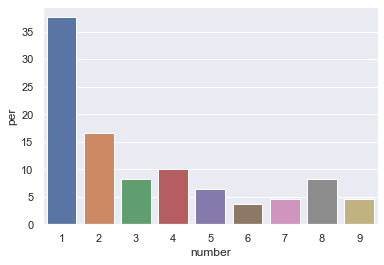

In [8]:
sns.barplot(x=river_area['number'], y=river_area['per'])

In [9]:
branch_number = get_number_ratio(river_data, 'branch_number')

In [10]:
branch_number

,number,value,per,accum,accum_per
0,1,27,24.770642,27,24.770642
1,3,18,16.513761,45,41.284404
2,2,17,15.596330,62,56.880734
3,4,12,11.009174,74,67.889908
4,7,9,8.256881,83,76.146789
5,5,8,7.339450,91,83.486239
6,8,7,6.422018,98,89.908257
7,6,7,6.422018,105,96.330275
8,9,4,3.669725,109,100.000000


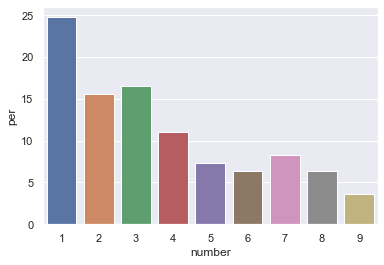

In [11]:
sns.barplot(x=branch_number['number'], y=branch_number['per'])

In [12]:
river_length = get_number_ratio(river_data, 'river_length')

In [13]:
river_length

,number,value,per,accum,accum_per
0,1,42,38.532110,42,38.532110
1,7,12,11.009174,54,49.541284
2,2,10,9.174312,64,58.715596
3,5,10,9.174312,74,67.889908
4,6,9,8.256881,83,76.146789
5,3,9,8.256881,92,84.403670
6,8,8,7.339450,100,91.743119
7,4,6,5.504587,106,97.247706
8,9,3,2.752294,109,100.000000


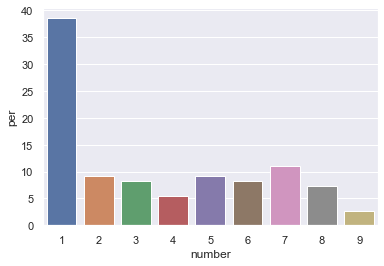

In [14]:
sns.barplot(x=river_length['number'], y=river_length['per'])

## 人口情報

[国勢調査](https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200521&tstat=000001011777&cycle=0&tclass1=000001094741)における人口情報。

In [17]:
population_data = pd.read_csv('./c01.csv', encoding='shift_jis')

In [21]:
population_data.columns = ['都道府県コード', '都道府県名', '元号', '和暦（年）', '西暦（年）', '注', 'population', 'population_male',
       'population_female']

In [22]:
population_data.head()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,population,population_male,population_female
0,00,全国,大正,9,1920,NaN,55963053,28044185,27918868
1,01,北海道,大正,9,1920,NaN,2359183,1244322,1114861
2,02,青森県,大正,9,1920,NaN,756454,381293,375161
3,03,岩手県,大正,9,1920,NaN,845540,421069,424471
4,04,宮城県,大正,9,1920,NaN,961768,485309,476459


In [23]:
population_all = get_number_ratio(population_data, 'population')

In [24]:
population_all

,number,value,per,accum,accum_per
0,1,445,45.408163,445,45.408163
1,2,137,13.979592,582,59.387755
2,8,95,9.693878,677,69.081633
3,7,80,8.163265,757,77.244898
4,5,56,5.714286,813,82.959184
5,6,51,5.204082,864,88.163265
6,9,45,4.591837,909,92.755102
7,4,37,3.775510,946,96.530612
8,3,33,3.367347,979,99.897959
9,-,1,0.102041,980,100.000000


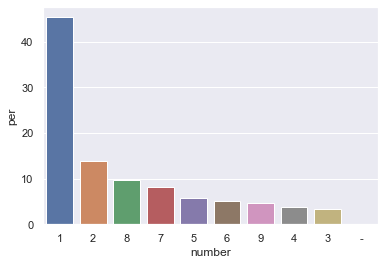

In [25]:
sns.barplot(x=population_all['number'], y=population_all['per'])

In [26]:
population_male = get_number_ratio(population_data, 'population_male')

In [27]:
population_male

,number,value,per,accum,accum_per
0,1,155,15.816327,155,15.816327
1,3,155,15.816327,310,31.632653
2,4,127,12.959184,437,44.591837
3,5,124,12.653061,561,57.244898
4,6,112,11.428571,673,68.673469
5,2,97,9.897959,770,78.571429
6,7,88,8.979592,858,87.551020
7,9,63,6.428571,921,93.979592
8,8,58,5.918367,979,99.897959
9,-,1,0.102041,980,100.000000


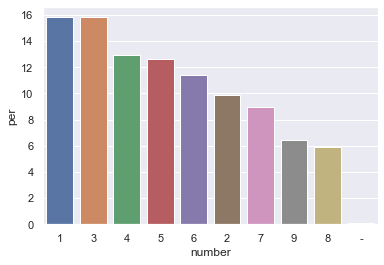

In [28]:
sns.barplot(x=population_male['number'], y=population_male['per'])

In [29]:
population_female = get_number_ratio(population_data, 'population_female')

In [30]:
population_female

,number,value,per,accum,accum_per
0,1,187,19.081633,187,19.081633
1,4,145,14.795918,332,33.877551
2,3,124,12.653061,456,46.530612
3,6,111,11.326531,567,57.857143
4,5,109,11.122449,676,68.979592
5,7,89,9.081633,765,78.061224
6,2,83,8.469388,848,86.530612
7,8,73,7.448980,921,93.979592
8,9,58,5.918367,979,99.897959
9,-,1,0.102041,980,100.000000


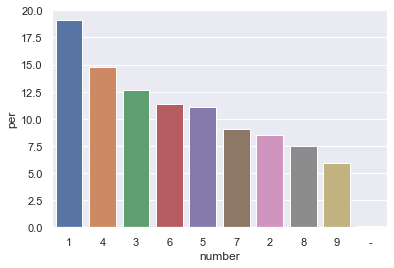

In [31]:
sns.barplot(x=population_female['number'], y=population_female['per'])

## 注意点

さすがに何でもかんでもこれが適用できるなんてことはなくて、たとえば知能指数（IQ)の分布なんかは当てはまらないし、高校・大学の偏差値も当てはまらない（知能指数は100、偏差値は50を中心に正規分布する）。身長や体重も当てはまらない（これは母集団によるかもしれないが。とりあえず、3歳までの幼児の身長、としたらほとんど1は出てこない）。ある店舗において、商品に設定されている様々な金額も法則には当てはまりにくい。

つまり、「正規分布に従うような分布から得られた数値群」である場合はこの法則が有効ではない。

ただし、こういった「法則が有効でない数値群」を**ランダム**に複数集めて、それらから値を**ランダム**で選択すると法則が有効になったりする（たとえば新聞に記載されている数値を取得するなど）。

あと、もともと数値の範囲が限定されていたり、法則性があるようなもの（電話番号、証明書の発行番号など）には適用できない。



## 類似の法則

パレートの法則：2割の要素が全体の8割を生み出している、というバラつきの状態を示すこと。「20:80の法則」と言われたりする。たとえば、全体の2割の主力商品がその企業の売り上げの8割を担っている、仕事時間のうちの2割で成果の8割をもたらすなど。パレートの法則は入れ子構造になる点が特徴的で、「ある企業の顧客のうち2割が売り上げの8割に貢献している場合、この優良顧客2割の中についてもパレートの法則が成り立つ」ということから[96:4の法則と言われることもある](https://uxdaystokyo.com/articles/glossary/pareto-principle/)らしい。

ジップの法則：テキスト中の語句について頻出順位と頻度を集計すると、頻出順位がk番目の語句の頻度は、頻出順位1位の語句の頻度を1/kした値になる、という法則。頻出順位が3位である単語の頻度は、頻出順位が1位である単語の1/3である、ということ。頻出順位をX軸、頻度をY軸にとってグラフ化すると反比例する。テキストだけではなく、[ある都市においてn番目に所得額が大きい人の所得額は、1番所得が大きい人の1/nになる](https://uxdaystokyo.com/articles/glossary/zipfs-law/)などジップの法則が成り立つケースがある、とのこと。

ここまで来て、「割合こそ多少の差があれど、なんかどれも似たようなこと言ってない？」と考えるのは自然で、上記の2つに**べき乗則**を合わせて「なにかデータを集めてきたらp(x)=Cx^-aになるよね」ってことを[表している](https://www.slideshare.net/HiroyukiKuromiya/ss-72611212)。